# 1. Load csv data

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/data/bike-sharing-demand/train.csv')
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 2. Make date column

In [2]:
train_df['year'] = pd.DatetimeIndex(train_df['datetime']).year
train_df['month'] = pd.DatetimeIndex(train_df['datetime']).month
train_df['day'] = pd.DatetimeIndex(train_df['datetime']).day
train_df['hour'] = pd.DatetimeIndex(train_df['datetime']).hour
train_df['minute'] = pd.DatetimeIndex(train_df['datetime']).minute
train_df['second'] = pd.DatetimeIndex(train_df['datetime']).second
train_df = train_df.drop(columns = ['datetime'])

train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 3. Vlsualiation Date Count

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='second', ylabel='count'>

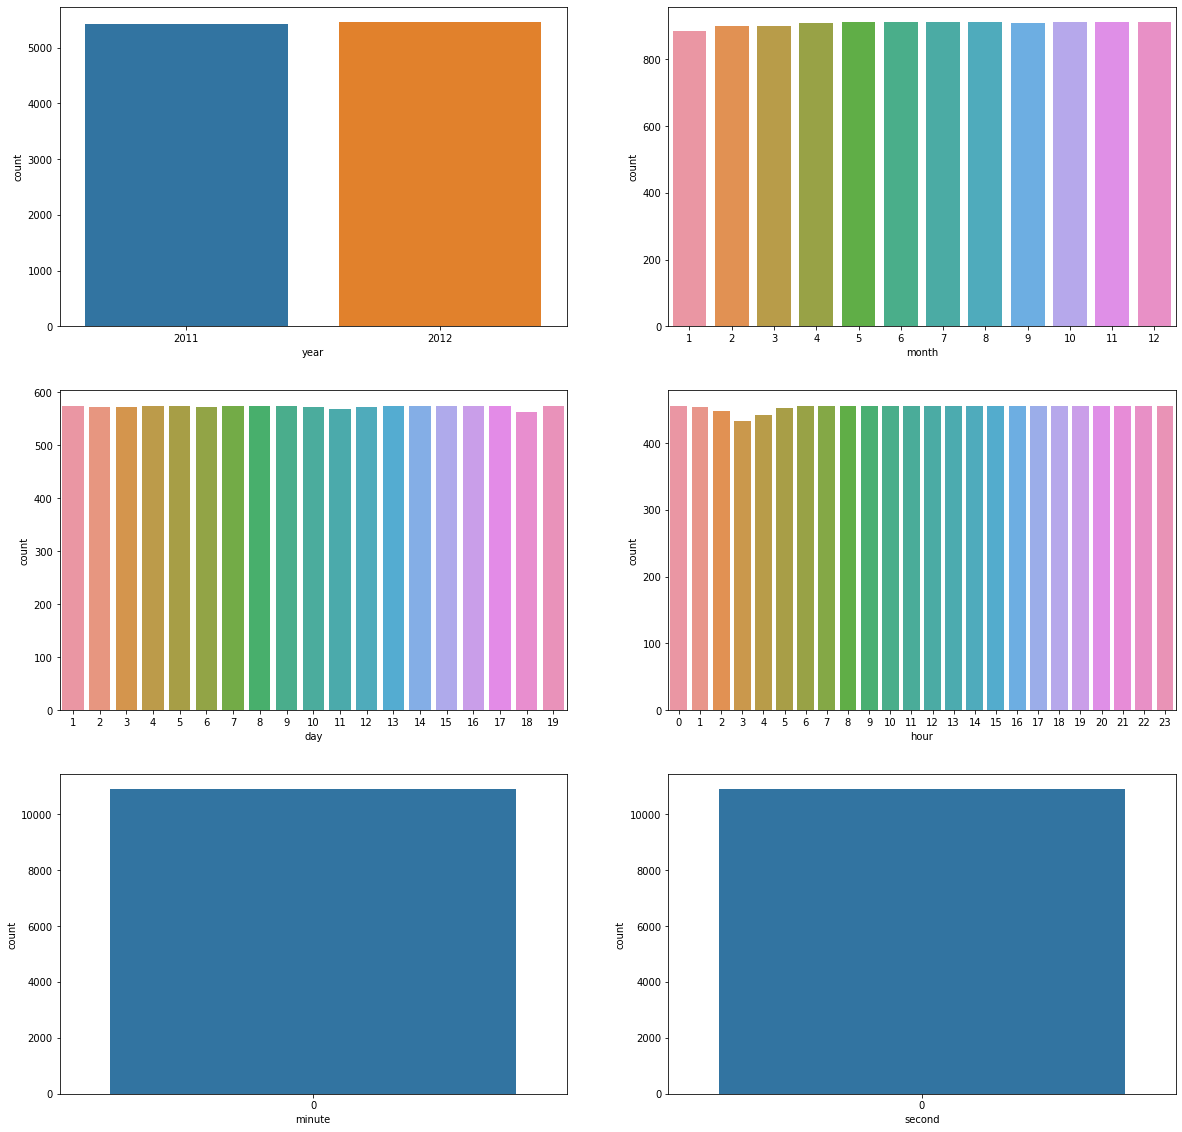

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(20,20))
sns.countplot(train_df['year'], ax=ax[0][0])
sns.countplot(train_df['month'], ax=ax[0][1])
sns.countplot(train_df['day'], ax=ax[1][0])
sns.countplot(train_df['hour'], ax=ax[1][1])
sns.countplot(train_df['minute'], ax=ax[2][0])
sns.countplot(train_df['second'], ax=ax[2][1])

# 4. Select X,Y Column & Seperate data

In [4]:
from sklearn.model_selection import train_test_split

x = train_df.drop('count', axis=1)
y = train_df['count']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

# 5. LinearRegression Model Training

In [5]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

## 6-1 Training Data Evaluation (RMSE)

In [6]:
from sklearn.metrics import mean_squared_error

y_train_predict = linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)
print("Training RMSE :",format(rmse, '.50f'))

Training RMSE : 0.00000000000048819166532202401230108329737043502147


## 6-2 Testing Data Evaluation (RMSE)

In [7]:
y_test_predict = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("Testing RMSE :",format(rmse, '.50f'))

Testing RMSE : 0.00000000000048406839078393576344136949011321847795


In [8]:
y_test = pd.DataFrame(data = y_test)
y_predict = pd.DataFrame(data = y_test_predict)
print(y_test.values[:10])
print()
print(y_predict.values[:10])

[[127]
 [ 13]
 [163]
 [233]
 [222]
 [166]
 [144]
 [376]
 [601]
 [ 53]]

[[127.]
 [ 13.]
 [163.]
 [233.]
 [222.]
 [166.]
 [144.]
 [376.]
 [601.]
 [ 53.]]


In [9]:
x_test['count'] = y_predict.values
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,count
3133,3,0,1,1,33.62,40.150,59,0.0000,29,98,2011,7,19,11,0,0,127.0
5786,1,1,0,1,4.10,6.820,54,6.0032,0,13,2012,1,16,6,0,0,13.0
5224,4,0,0,1,9.84,11.365,48,12.9980,12,151,2011,12,11,18,0,0,163.0
8953,3,0,1,2,29.52,34.090,62,12.9980,70,163,2012,8,15,10,0,0,233.0
8054,2,0,1,1,25.42,31.060,53,16.9979,46,176,2012,6,15,23,0,0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012,106,245,2011,5,8,17,0,0,351.0
5807,1,0,1,3,13.12,15.150,66,22.0028,0,2,2012,1,17,4,0,0,2.0
10061,4,0,0,1,16.40,20.455,40,12.9980,149,360,2012,11,4,14,0,0,509.0
5427,1,0,0,1,11.48,14.395,81,7.0015,0,5,2012,1,1,5,0,0,5.0


# 7. Visulation

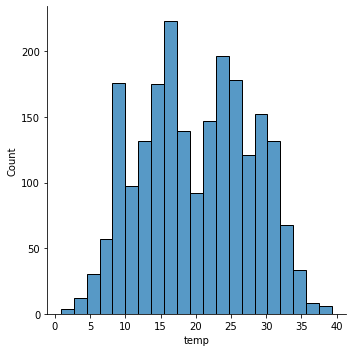

In [10]:
sns.displot(x = x_test['temp'], data = x_test['count'])

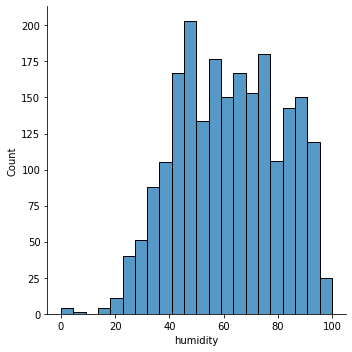

In [11]:
sns.displot(x = x_test['humidity'], data = x_test['count'])